In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data = pd.read_csv('DS_Sber.csv', sep=';')

data.columns = data.columns.str.lower()
data['reportdate'] = data['reportdate'].str.replace('.', '/')
data["reportdate"] = pd.to_datetime(data["reportdate"], infer_datetime_format=True)

data.head()

C:\Temp\ipykernel_11304\3811782165.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['reportdate'] = data['reportdate'].str.replace('.', '/')


,reportdate,value
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149


In [16]:
df = np.array(data.value.copy()).reshape(-1, 1)

train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):]

len(train_data), len(test_data)

(1688, 423)

In [22]:
def create_data(data, window):
    x = []
    y = []
    for i in range(window, len(data)):
        x.append(data[i - window:i, 0])
        y.append(data[i, 0])
    x = np.array(x)
    y = np.array(y)
    return [x, y]

In [61]:
window = 30

x_train, y_train = create_data(train_data, window)
x_test, y_test = create_data(test_data, window)

x_train.shape, y_train.shape

((1658, 30), (1658,))

In [67]:
import xgboost as xgb

In [68]:
model = xgb.XGBRegressor(tree_method="gpu_hist")

In [69]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [70]:
predict = model.predict(x_test)

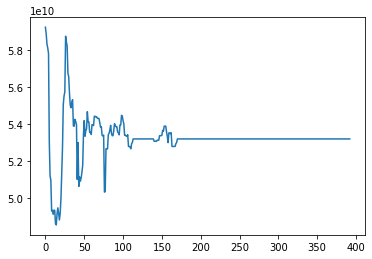

In [71]:
plt.plot(predict)